### Анализ частот и распределения ИС в новостном корпусе (Фонтанка)

Анализ состоит из двух этапов:
1. Сравнение частотности разных типов ИС в текстах разных рубрик (функция i_want_a_plot).
2. Сравнение частотности 10 самых популярных представителей каждого типа ИС в каждой рубрике (функция more_plots).

In [3]:
from collections import Counter
import pandas as pd
import re
from collections import defaultdict
import glob
import matplotlib.pyplot as plt

In [4]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,
    DatesExtractor,
    MoneyExtractor,
    AddrExtractor,

    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

In [5]:
pd.set_option('display.max_colwidth', None)  

##### Функция, извлекающая из файла текст и рубрику

In [6]:
def get_text(path):
    with open(path, 'r', encoding='utf8') as file:
        df = pd.read_table(path)
        pre_rubric = str(df.section)
        try:
            rubric = re.search('(?<=\[\')[A-Za-z]+', pre_rubric).group(0)
        except AttributeError:
            rubric = 'other'
        pre_text = str(df.text)
        text = re.findall('(?<=0    ).+', pre_text)[0]
    return text, rubric

##### Извлекаем текст и рубрику из всех файлов корпуса, сразу проводим извлечение ИС и нормализацию, сохраняем данные в словарь fin

In [7]:
file_list = glob.glob('C:\\Users\\Asus\\corp\\*.tsv')

fin = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

for file in file_list:
    try:
        pre_processed = get_text(file)
    except:
        pass
    text = pre_processed[0]
    rubric = pre_processed[1]
    
    doc_article = Doc(text)

    doc_article.segment(segmenter)
    doc_article.tag_morph(morph_tagger)
    doc_article.tag_ner(ner_tagger)
    
    for span in doc_article.spans:
        span.normalize(morph_vocab)
        fin[rubric][span.type][span.normal] += 1
        
    print(f"I've already processed {file}")

I've already processed C:\Users\Asus\corp\art202004200.tsv
I've already processed C:\Users\Asus\corp\art202004201.tsv
I've already processed C:\Users\Asus\corp\art2020042010.tsv
I've already processed C:\Users\Asus\corp\art2020042011.tsv
I've already processed C:\Users\Asus\corp\art2020042012.tsv
I've already processed C:\Users\Asus\corp\art2020042013.tsv
I've already processed C:\Users\Asus\corp\art2020042014.tsv
I've already processed C:\Users\Asus\corp\art2020042015.tsv
I've already processed C:\Users\Asus\corp\art2020042016.tsv
I've already processed C:\Users\Asus\corp\art2020042017.tsv
I've already processed C:\Users\Asus\corp\art2020042018.tsv
I've already processed C:\Users\Asus\corp\art2020042019.tsv
I've already processed C:\Users\Asus\corp\art202004202.tsv
I've already processed C:\Users\Asus\corp\art2020042020.tsv
I've already processed C:\Users\Asus\corp\art2020042021.tsv
I've already processed C:\Users\Asus\corp\art2020042022.tsv
I've already processed C:\Users\Asus\corp\a

##### Для первого этапа анализа словарь fin нужно обработать - создаем словарь data

In [8]:
data = defaultdict(lambda: defaultdict(int))

for rubric in fin.keys():
    for key in fin[rubric].keys():
        result = (sum(fin[rubric][key].values()))
        data[rubric][key] = result

##### Функция, выполняющая первый этап анализа (подсчет числа представителей каждого типа ИС в каждой рубрике)

In [9]:
def i_want_a_plot(data):
    rubrics = list(data.keys())
    for rubric in rubrics:
        labels = list(data[rubric].keys())
        nums = list(data[rubric].values())
        plt.figure(figsize=(15,5))
        plt.title(f'{rubric}', fontsize=20)
        plt.xticks(fontsize=17)
        plt.bar(np.arange(len(nums)), nums, color='red', alpha=0.6, tick_label=labels)

##### Графики первого этапа

<ipython-input-9-eee1405486a8>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,5))


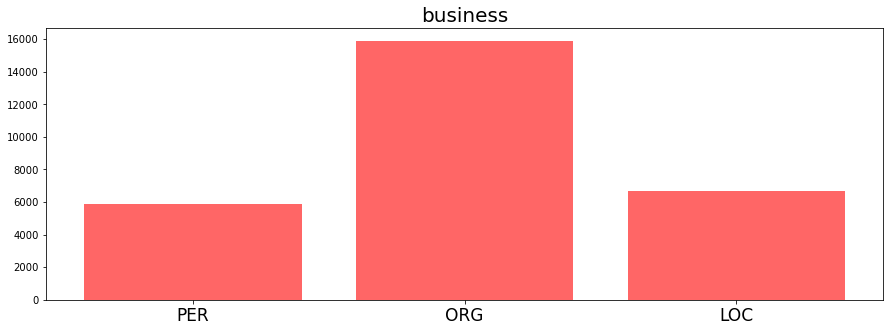

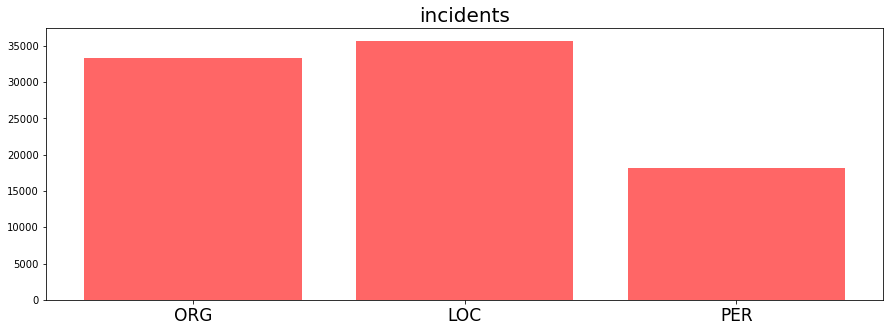

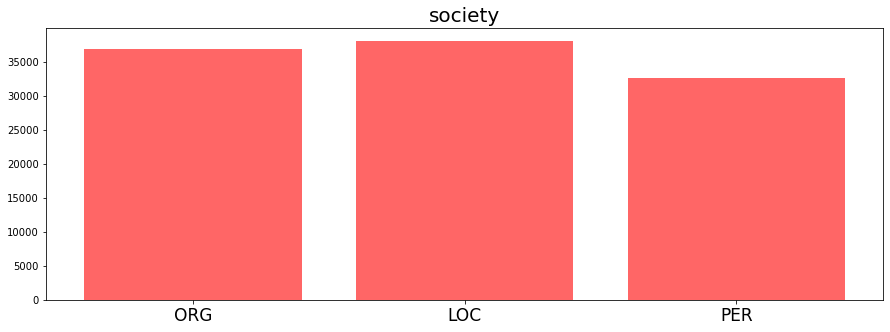

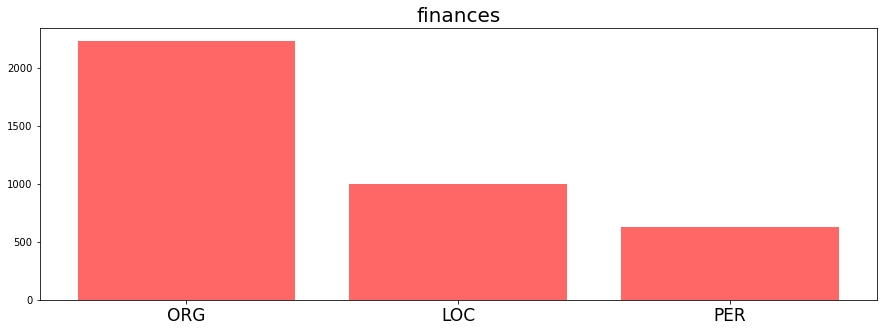

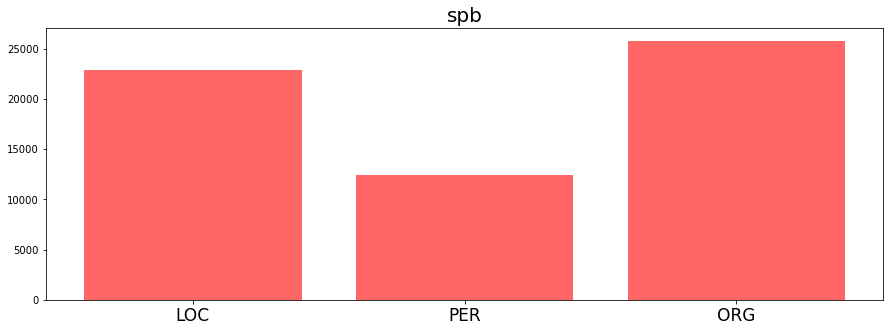

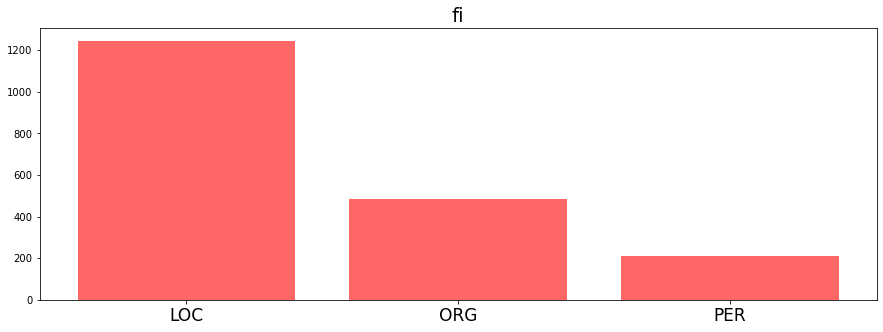

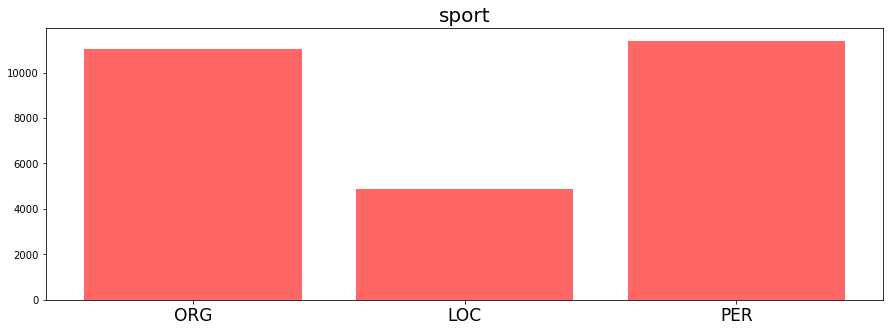

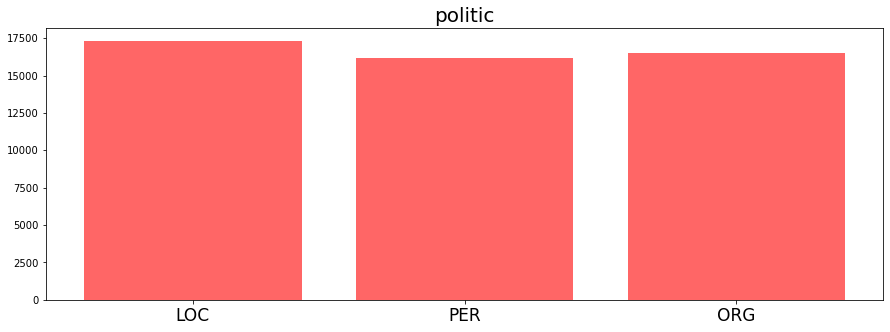

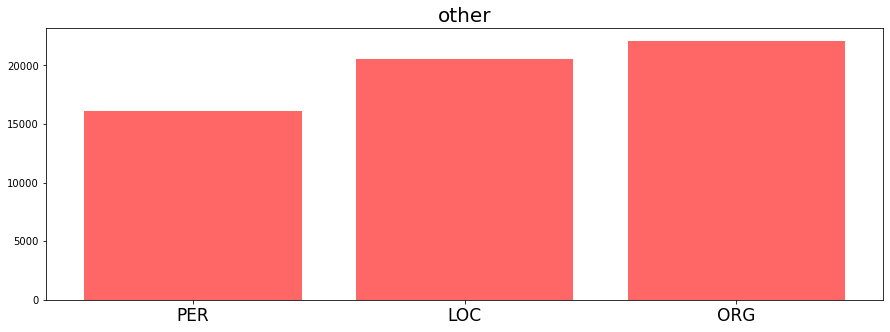

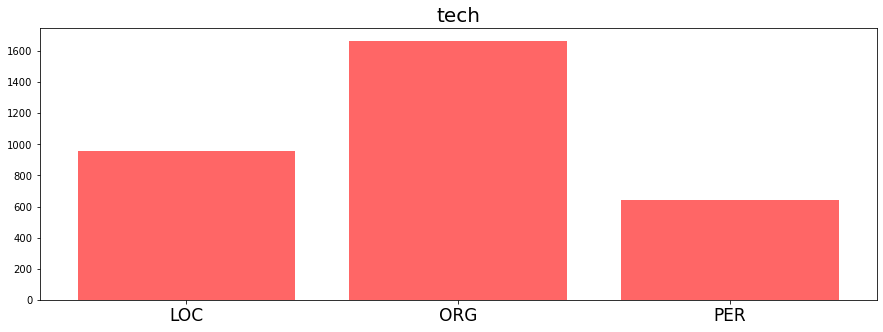

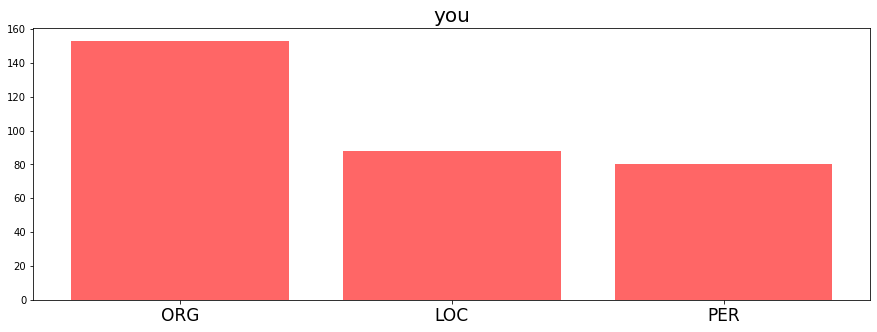

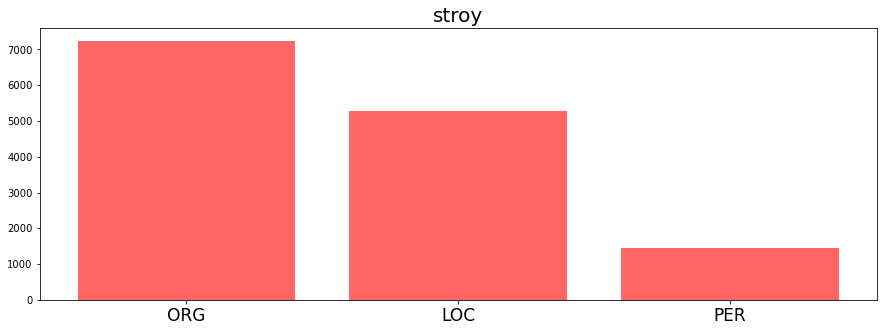

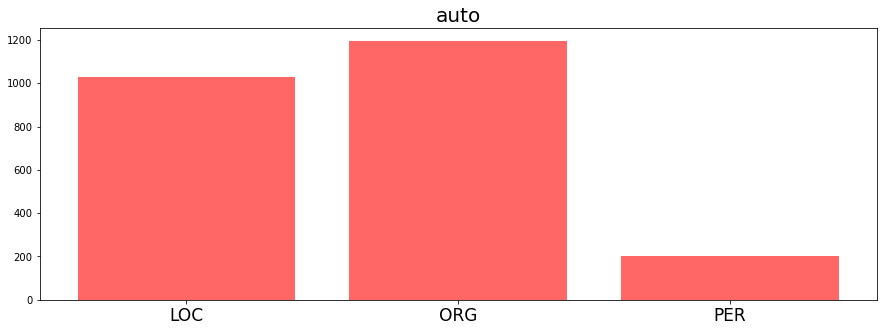

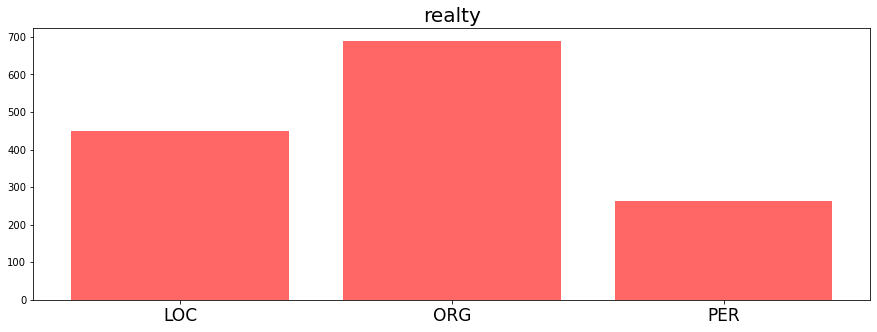

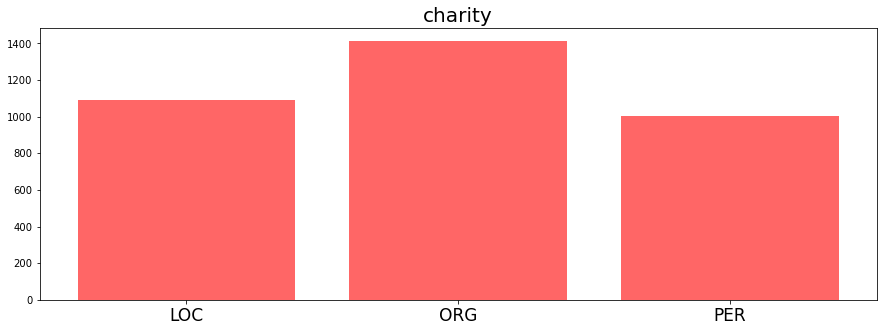

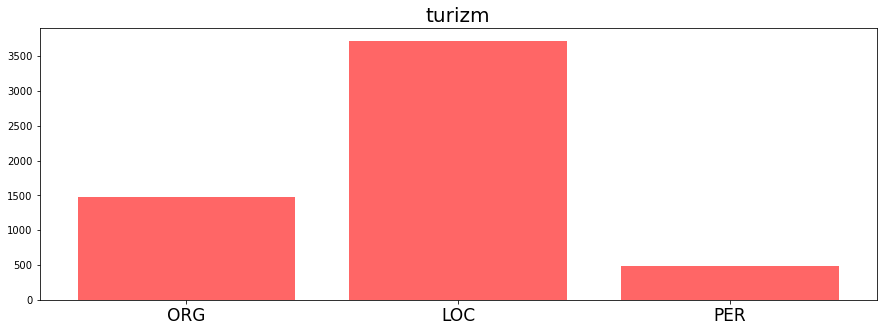

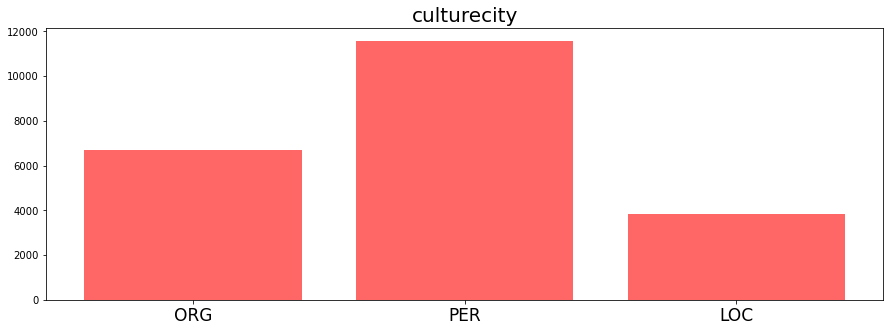

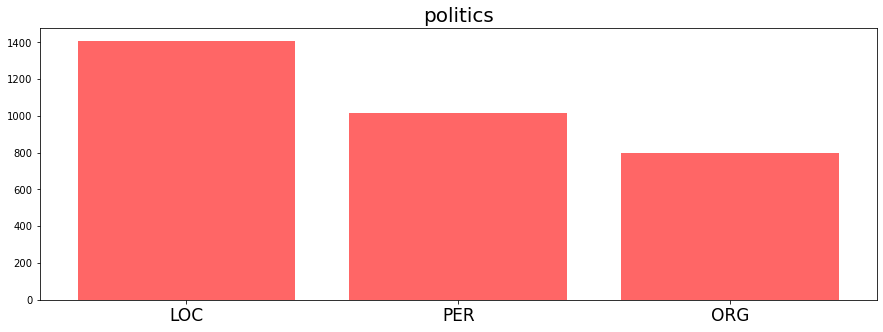

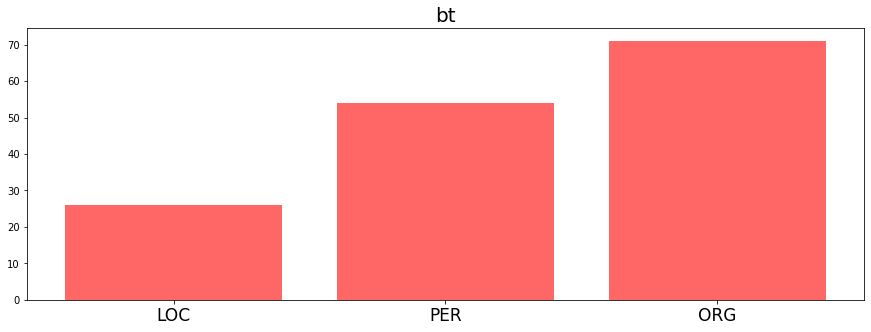

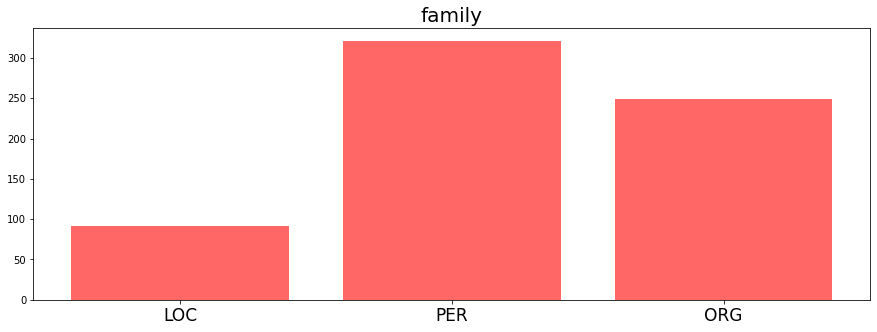

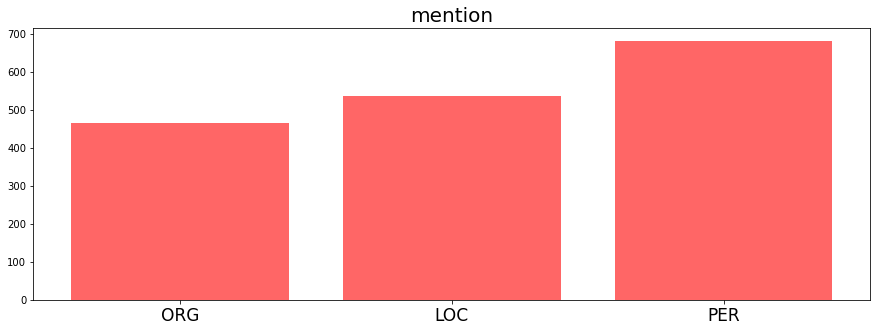

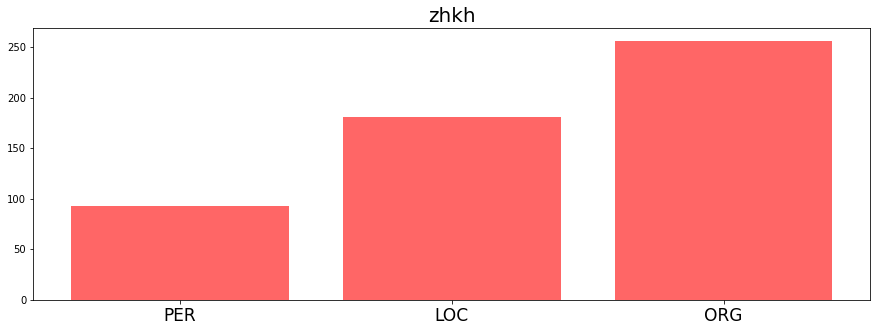

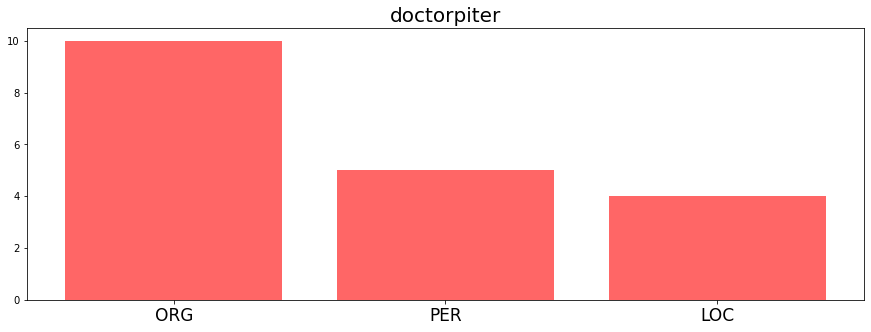

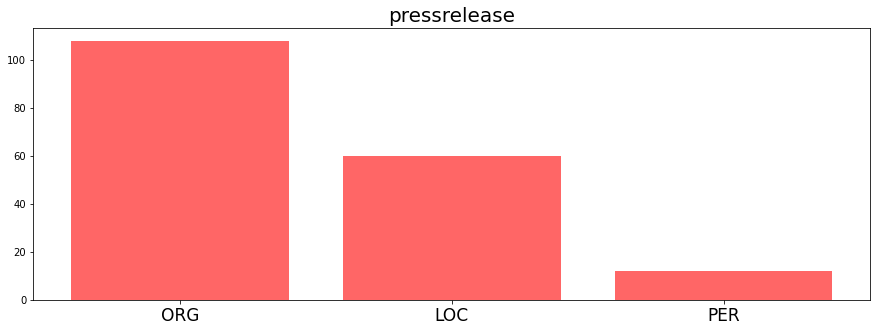

In [10]:
i_want_a_plot(data)

##### Функция, выполняющая второй этап анализа (выбор 10 самых часто встречавшихся представителей каждого типа ИС в каждой рубрике и представление их частоты их встречаемости на графике)

In [93]:
def more_plots(data):
    for rubric in data:
        for key in data[rubric]:
            if key in ['PER', 'ORG', 'LOC']:
                occ = data[rubric][key]
                sort = sorted(occ.items(), key=lambda x: x[1], reverse=True)
                pop = sort[:10]

                labels = [x[0] for x in pop]
                nums = [x[1] for x in pop]

                plt.barh(labels, nums)
                plt.title(f'The 10 most frequent occurences of {key} in {rubric}')
                plt.show()

##### Графики второго этапа

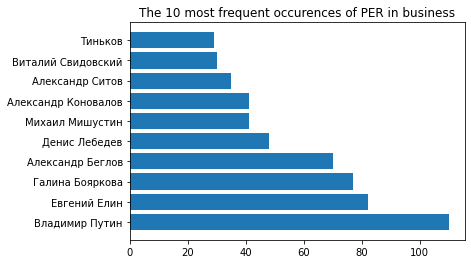

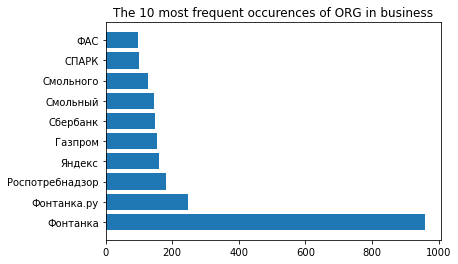

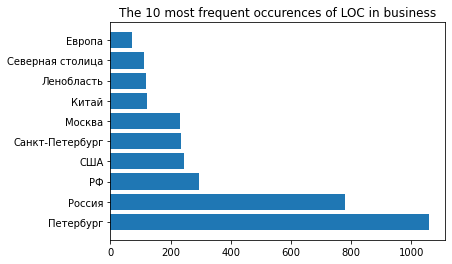

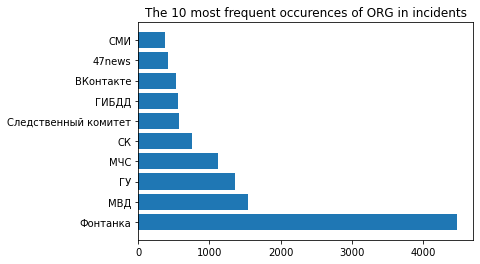

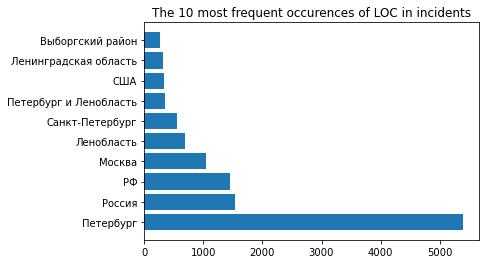

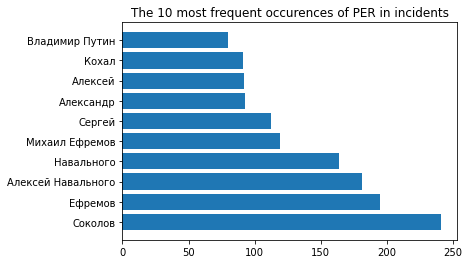

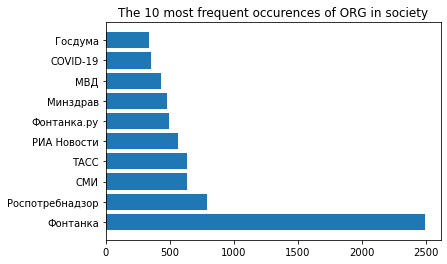

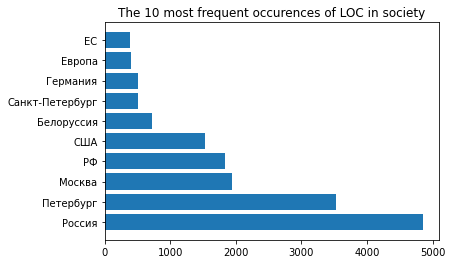

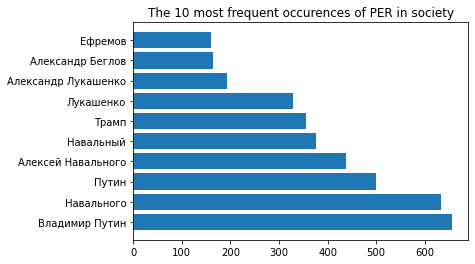

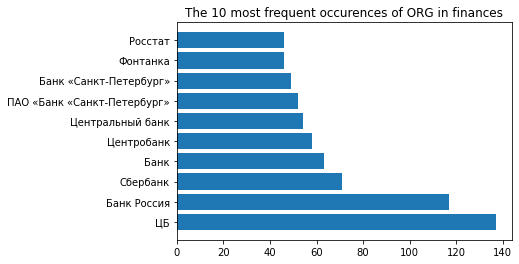

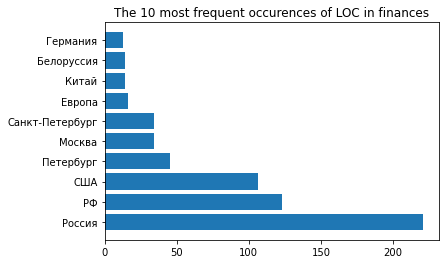

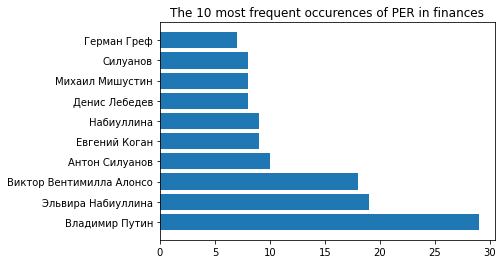

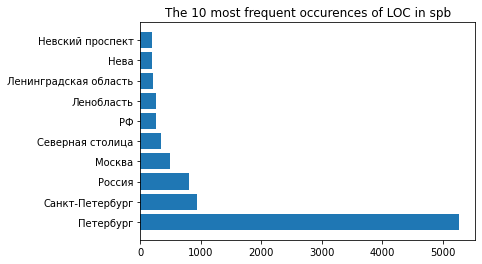

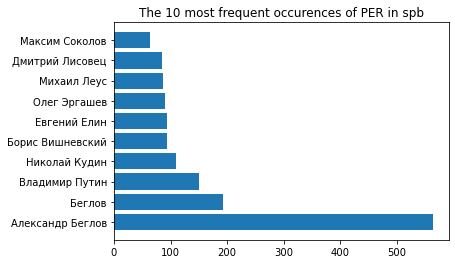

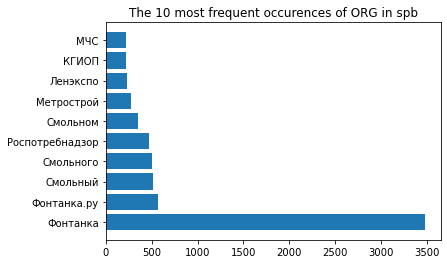

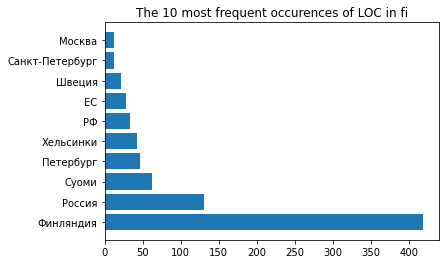

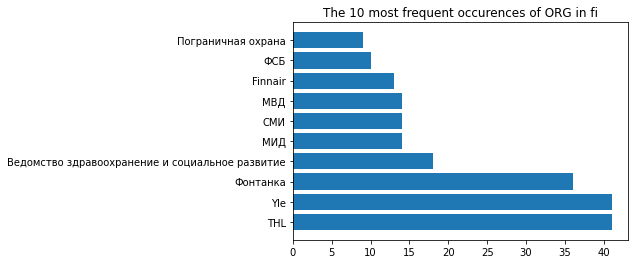

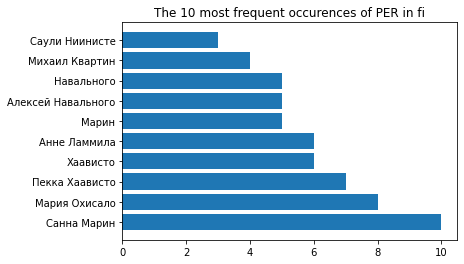

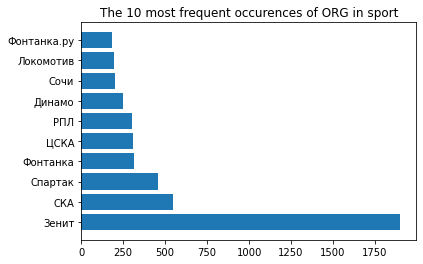

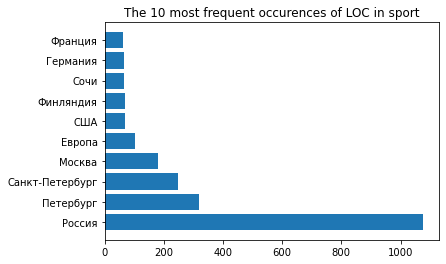

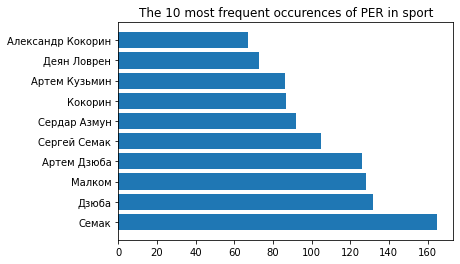

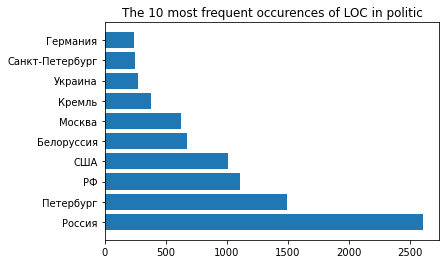

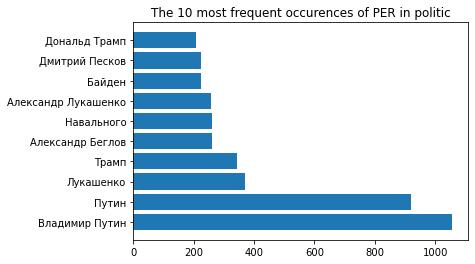

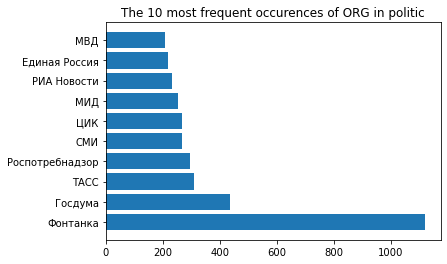

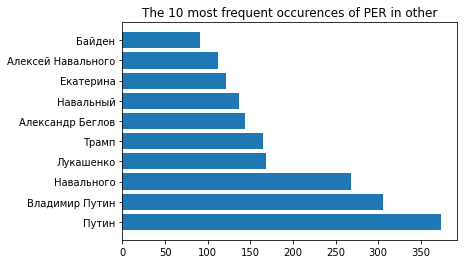

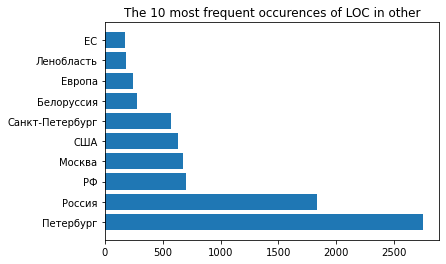

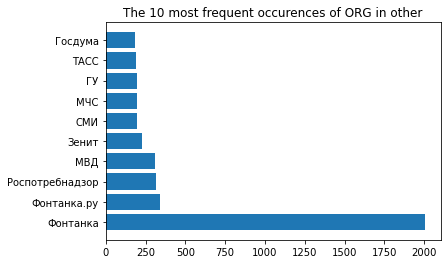

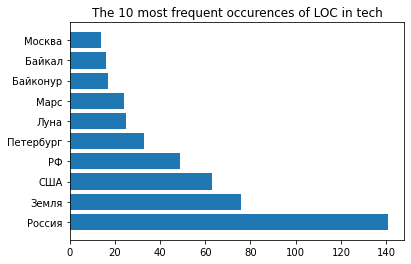

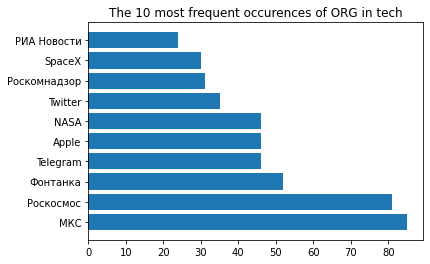

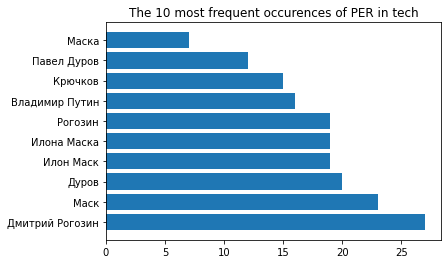

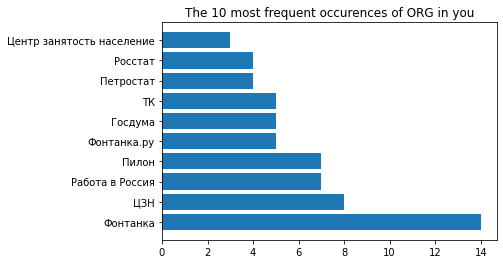

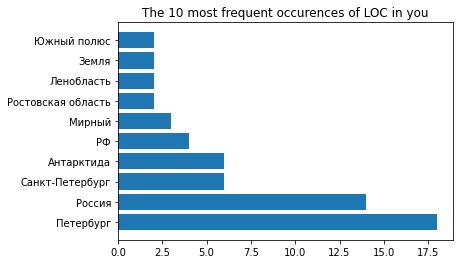

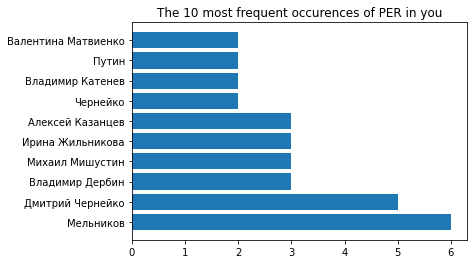

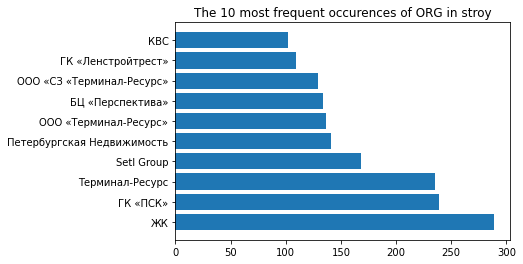

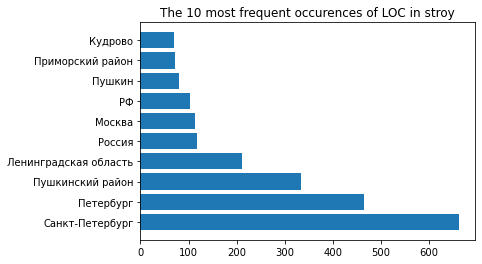

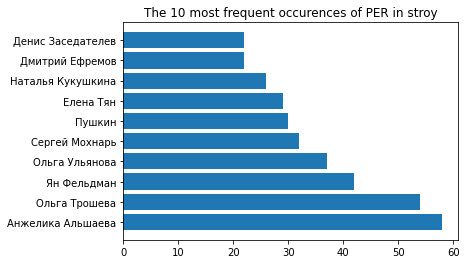

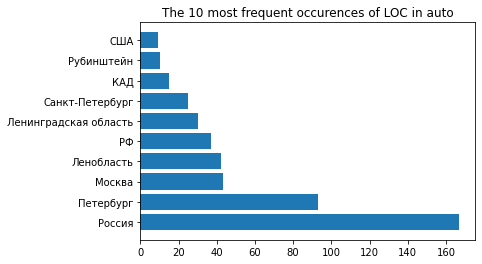

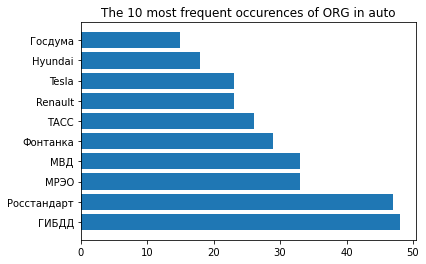

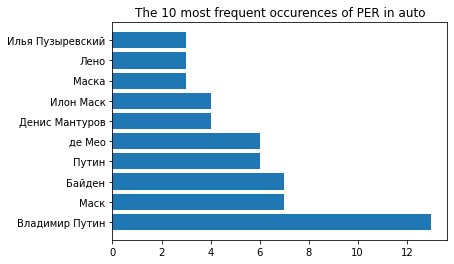

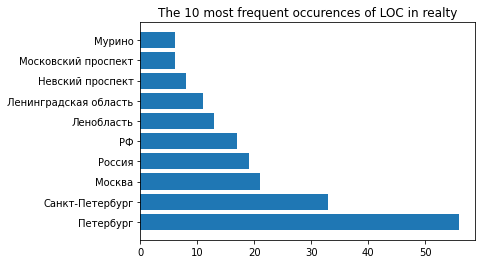

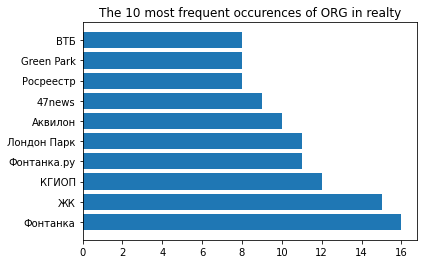

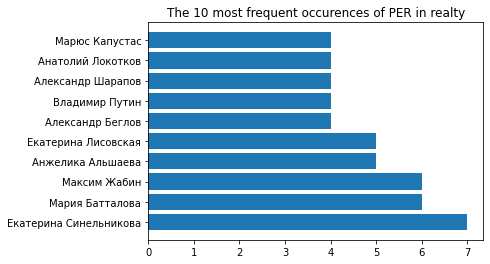

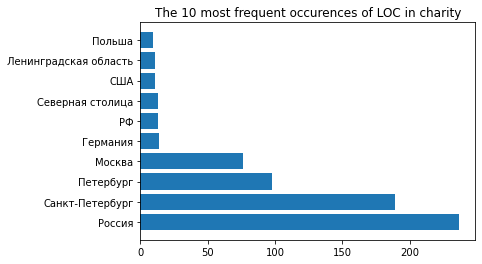

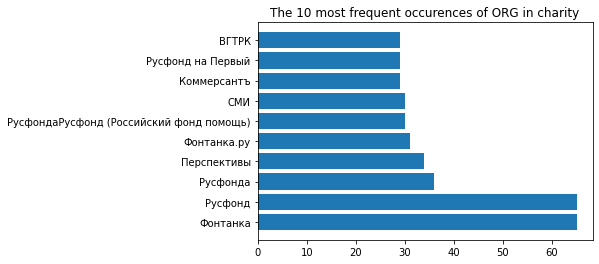

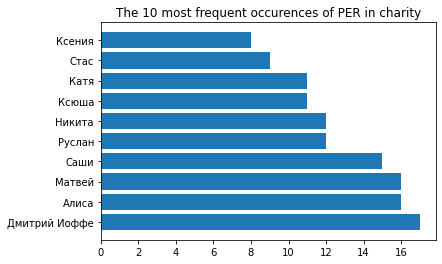

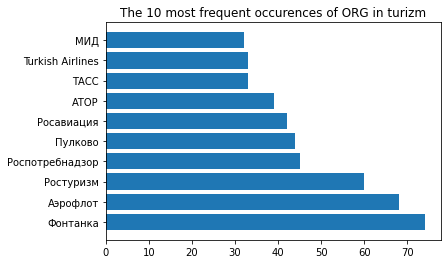

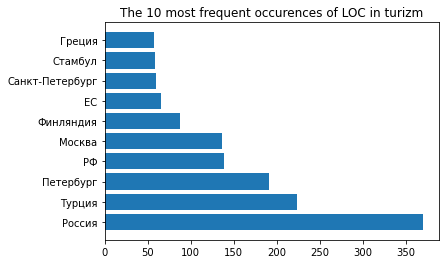

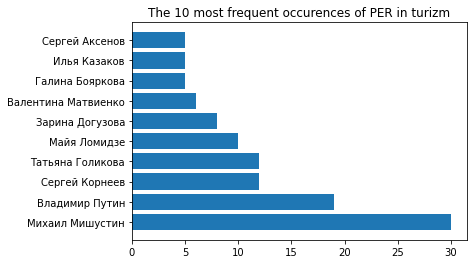

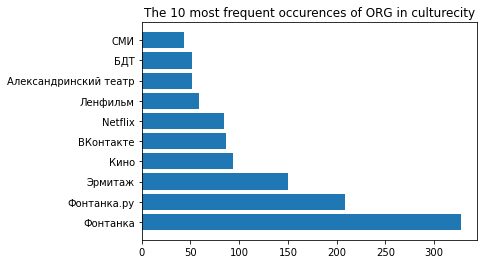

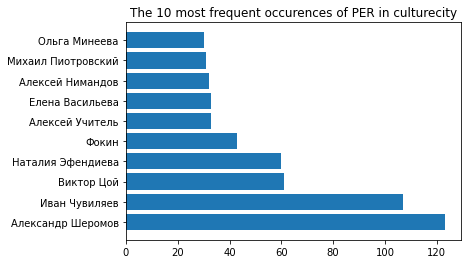

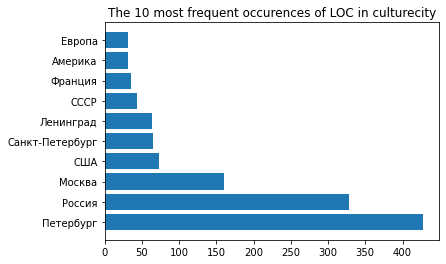

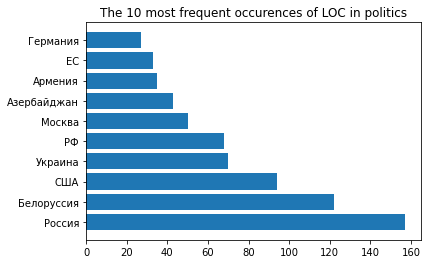

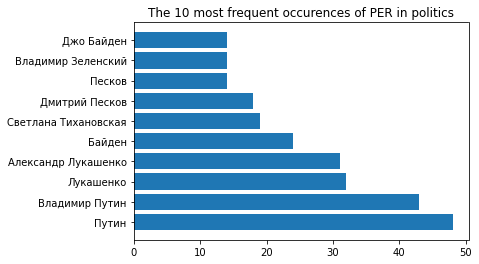

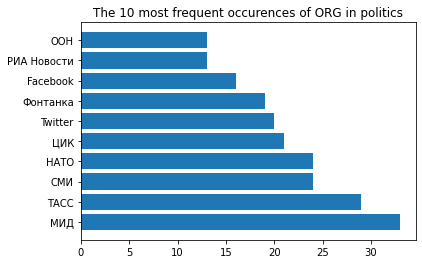

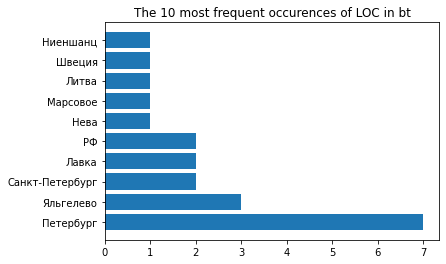

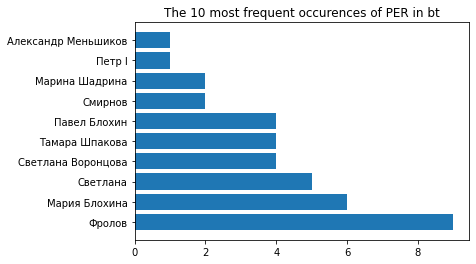

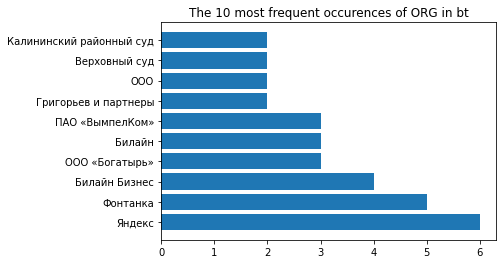

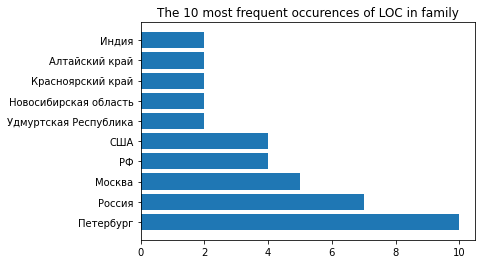

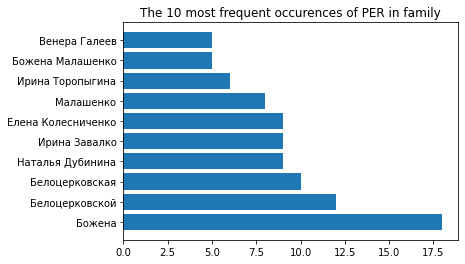

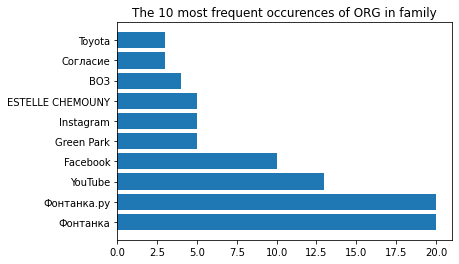

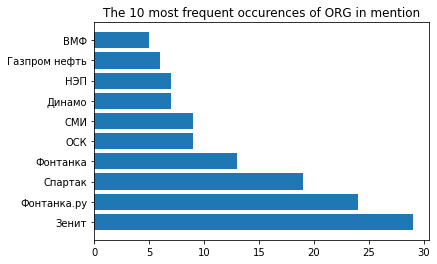

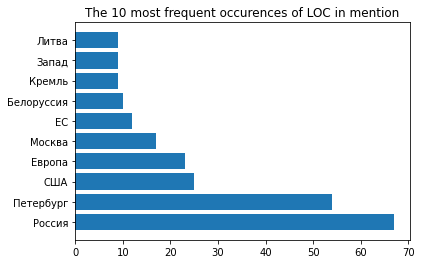

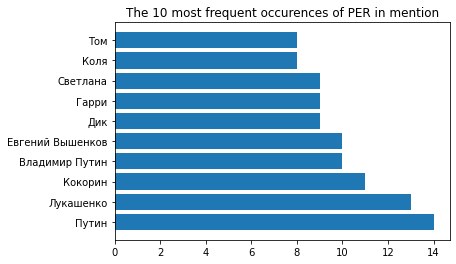

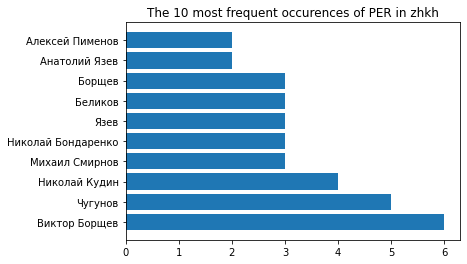

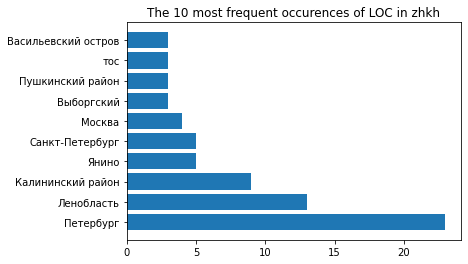

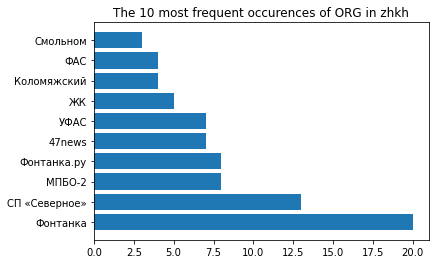

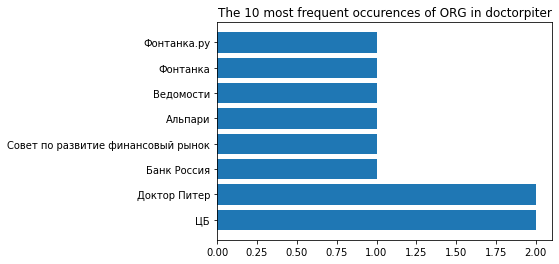

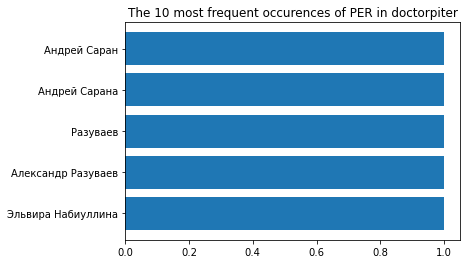

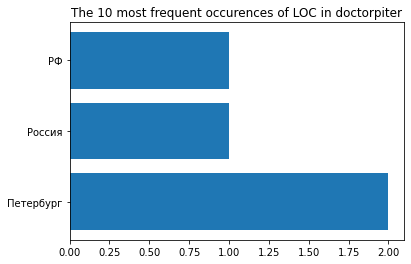

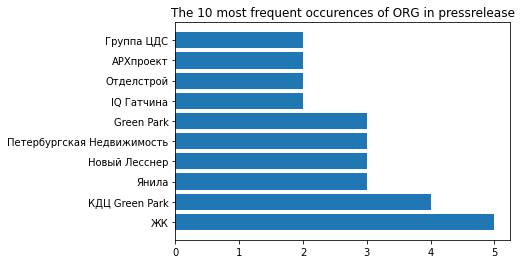

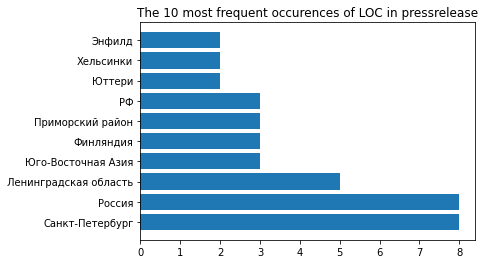

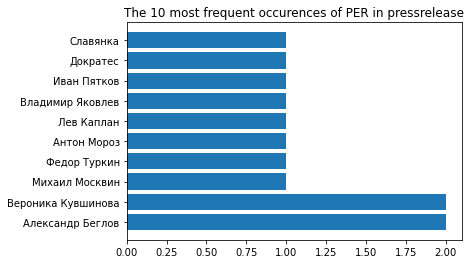

In [94]:
more_plots(fin)